>>>>>                                           Project Milestone #01: Interim Report 1 Work on Predicting The Sales Of Products Across Stores Of A Retail Chain.                                                                                     

                                                                        IMPORTING THE BASIC LIBRARIES AND LOADING THE DATA.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv(r'D:\TSC_iON\useful\train_data.csv')
data

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0
...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0


In [36]:
week = pd.read_csv(r'D:\TSC_iON\useful\date_to_week_id_map.csv')
week

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49
...,...,...
816,2014-03-27,165
817,2014-03-28,165
818,2014-03-29,166
819,2014-03-30,166


In [37]:
selling_price = pd.read_csv(r'D:\TSC_iON\useful\product_prices.csv')
selling_price 

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94
...,...,...,...,...
58995,333,3021,162,2.08
58996,333,3021,163,2.08
58997,333,3021,164,2.08
58998,333,3021,165,2.08


                                                                        EXPLORATORY DATA ANALYSIS/ DATA UNDERSTANDING.

In [38]:
print('\t''\t''\t''\t''\t''data')
print('-> Data Informations:-')
data.info()
print()
print('-> Data(Observations, Features):-' , data.shape)
print()
print('-> Total Size of the Dataset is:-' , data.size)
print()
print('-> Stat Summary of Data:-' '\n', data.describe())
print()
print('-> Number of Duplicates if any;''\n', data.duplicated().value_counts())
print()
print('-> Number of Unique Values of Data-Points;''\n',data.nunique())
print()
print('-> Number of Missing Values if any ;' '\n', data.isna().sum())
print()
print('-> Data Types;''\n', data.dtypes)

					data
-> Data Informations:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date                   395000 non-null  object
 1   product_identifier     395000 non-null  int64 
 2   department_identifier  395000 non-null  int64 
 3   category_of_product    395000 non-null  object
 4   outlet                 395000 non-null  int64 
 5   state                  395000 non-null  object
 6   sales                  395000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 21.1+ MB

-> Data(Observations, Features):- (395000, 7)

-> Total Size of the Dataset is:- 2765000

-> Stat Summary of Data:-
        product_identifier  department_identifier         outlet          sales
count       395000.000000          395000.000000  395000.000000  395000.000000
mean          1509.960000              24.460000     211.20000

In [39]:
print('\t''\t''\t''\t''\t''week')
print('-> Data Informations:-')
week.info()
print()
print('-> Data(Observations, Features):-' , week.shape)
print()
print('-> Total Size of the Dataset is:-' , week.size)
print()
print('-> Stat Summary of Data:-' '\n', week.describe())
print()
print('-> Number of Duplicates if any;''\n', week.duplicated().value_counts())
print()
print('-> Number of Unique Values of Data-Points;''\n',week.nunique())
print()
print('-> Number of Missing Values if any ;' '\n', week.isna().sum())
print()
print('-> Data Types;''\n', week.dtypes)

					week
-> Data Informations:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     821 non-null    object
 1   week_id  821 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB

-> Data(Observations, Features):- (821, 2)

-> Total Size of the Dataset is:- 1642

-> Stat Summary of Data:-
           week_id
count  821.000000
mean   107.286236
std     33.879588
min     49.000000
25%     78.000000
50%    107.000000
75%    137.000000
max    166.000000

-> Number of Duplicates if any;
 False    821
dtype: int64

-> Number of Unique Values of Data-Points;
 date       821
week_id    118
dtype: int64

-> Number of Missing Values if any ;
 date       0
week_id    0
dtype: int64

-> Data Types;
 date       object
week_id     int64
dtype: object


In [40]:
print('\t''\t''\t''\t''\t''selling_price')
print('-> Data Informations:-')
selling_price.info()
print()
print('-> Data(Observations, Features):-' , selling_price.shape)
print()
print('-> Total Size of the Dataset is:-' , selling_price.size)
print()
print('-> Stat Summary of Data:-' '\n', selling_price.describe())
print()
print('-> Number of Duplicates if any;''\n', selling_price.duplicated().value_counts())
print()
print('-> Number of Unique Values of Data-Points;''\n',selling_price.nunique())
print()
print('-> Number of Missing Values if any ;' '\n', selling_price.isna().sum())
print()
print('-> Data Types;''\n', selling_price.dtypes)

					selling_price
-> Data Informations:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   outlet              59000 non-null  int64  
 1   product_identifier  59000 non-null  int64  
 2   week_id             59000 non-null  int64  
 3   sell_price          59000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB

-> Data(Observations, Features):- (59000, 4)

-> Total Size of the Dataset is:- 236000

-> Stat Summary of Data:-
              outlet  product_identifier       week_id    sell_price
count  59000.000000        59000.000000  59000.000000  59000.000000
mean     211.200000         1509.960000    107.500000      4.987705
std       91.161949          809.805355     34.062731      3.874620
min      111.000000           74.000000     49.000000      0.050000
25%      113.000000          926.000000     78.000

In [41]:
data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [42]:
week.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [43]:
selling_price.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


    --> UNIVARIATE ANALYSIS.

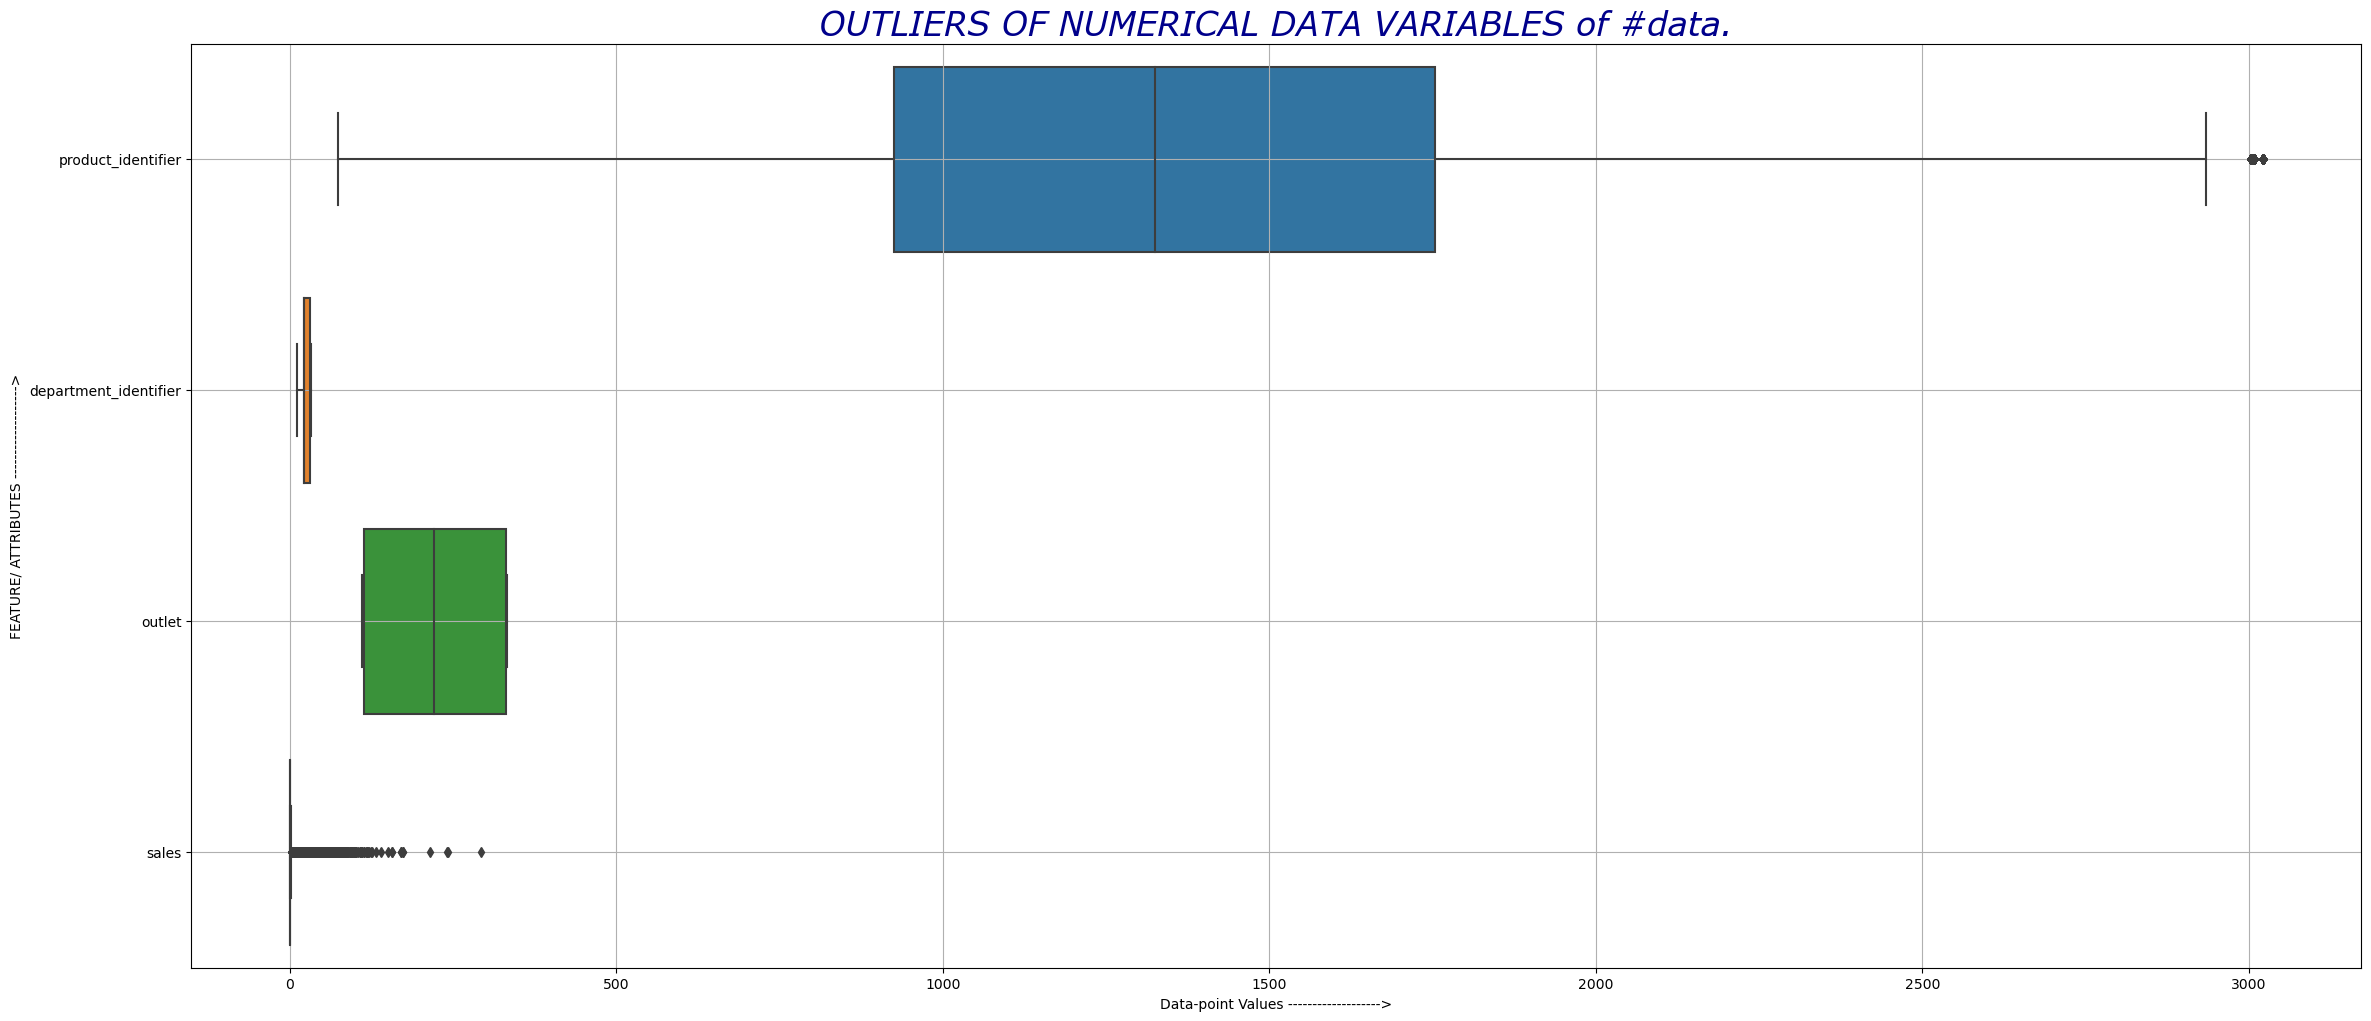

In [44]:
plt.figure(figsize=(28,12))
sns.boxplot(data = data, orient = 'h' )
plt.title('OUTLIERS OF NUMERICAL DATA VARIABLES of #data.', fontdict = {'family': 'Verdana', 'color':  'darkblue', 'style':'italic', 'size':'24'})
plt.xlabel('Data-point Values ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.grid()

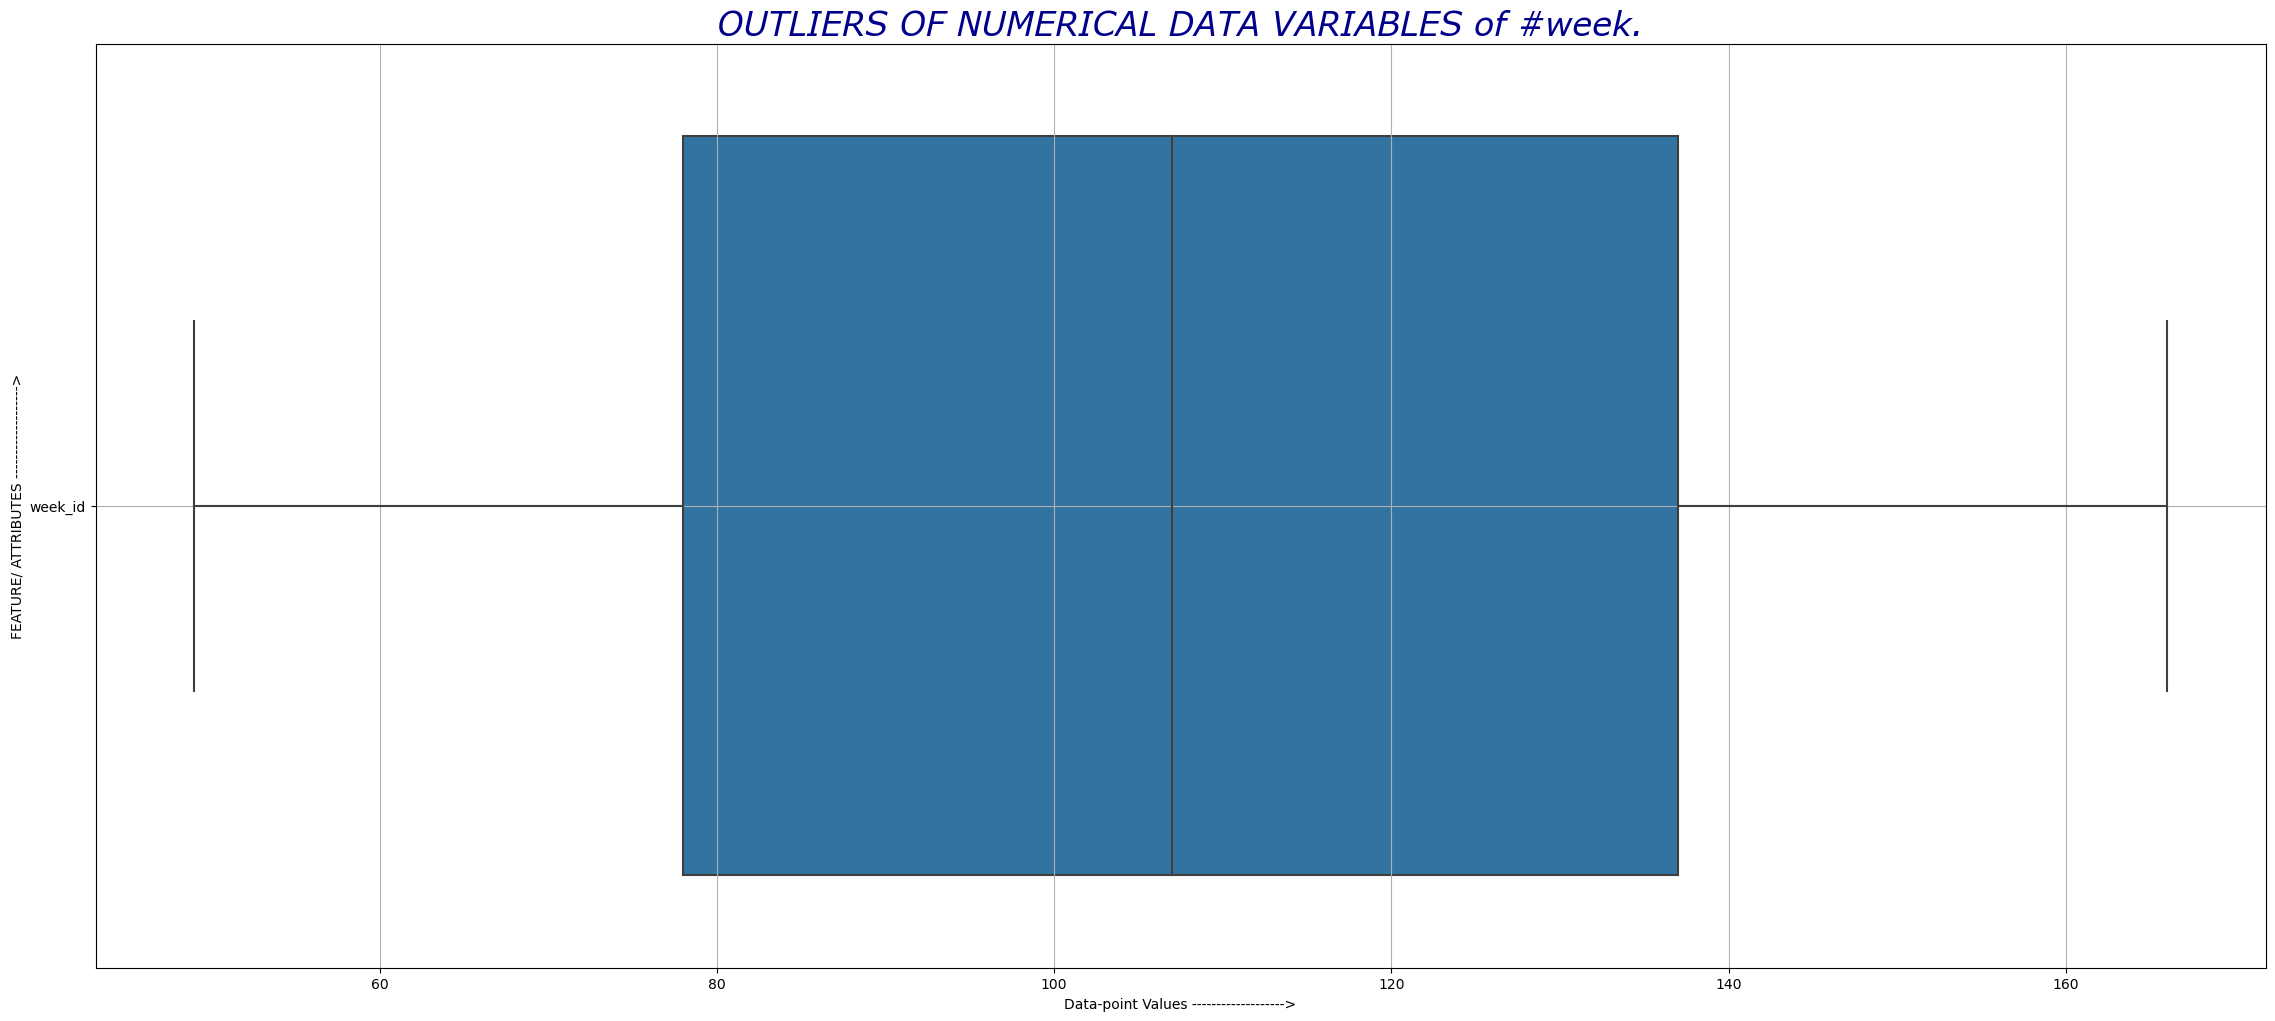

In [45]:
plt.figure(figsize=(28,12))
sns.boxplot(data = week, orient = 'h' )
plt.title('OUTLIERS OF NUMERICAL DATA VARIABLES of #week.', fontdict = {'family': 'Verdana', 'color':  'darkblue', 'style':'italic', 'size':'24'})
plt.xlabel('Data-point Values ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.grid()

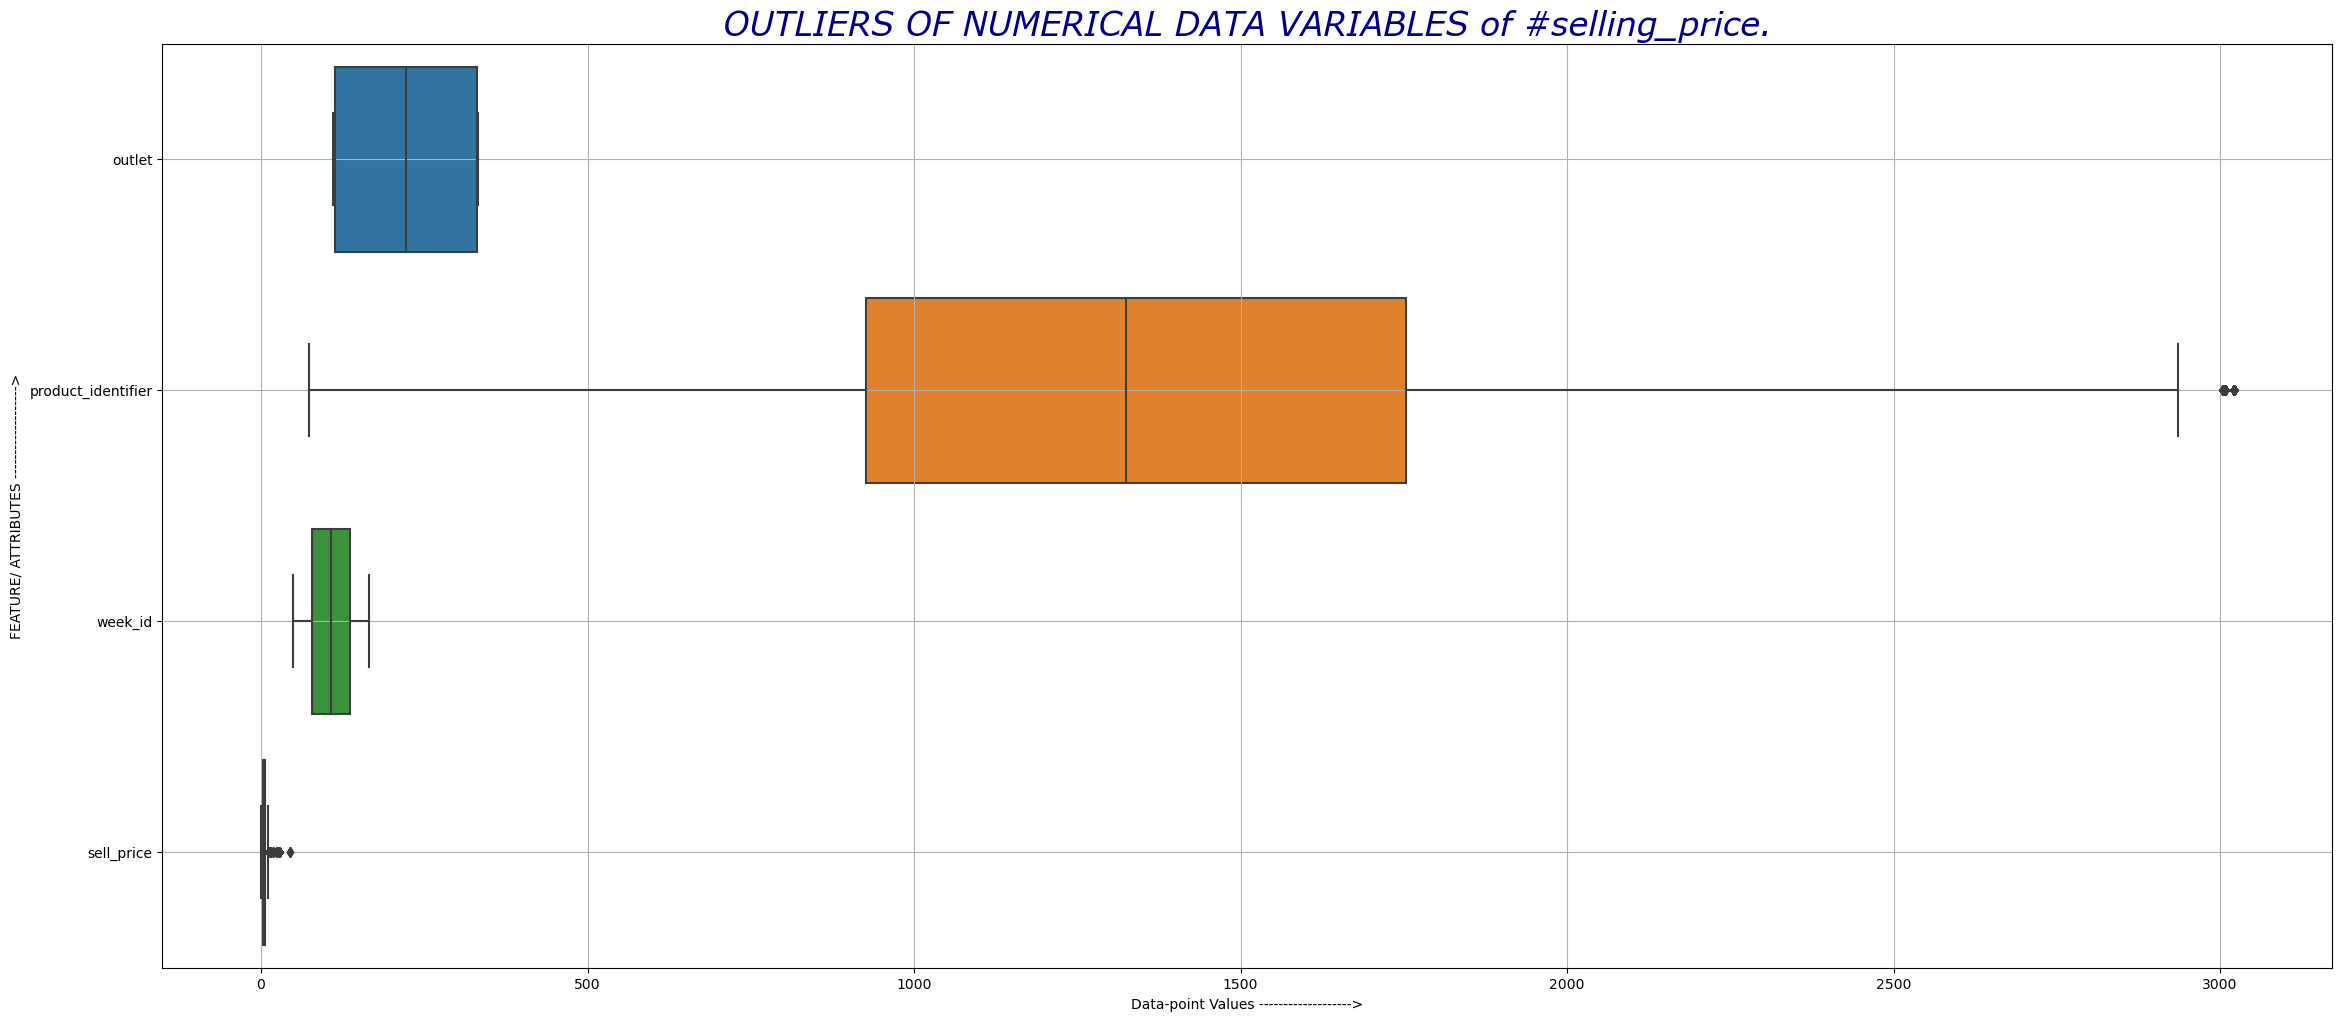

In [46]:
plt.figure(figsize=(28,12))
sns.boxplot(data = selling_price, orient = 'h' )
plt.title('OUTLIERS OF NUMERICAL DATA VARIABLES of #selling_price.', fontdict = {'family': 'Verdana', 'color':  'darkblue', 'style':'italic', 'size':'24'})
plt.xlabel('Data-point Values ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.grid()

In [47]:
data.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

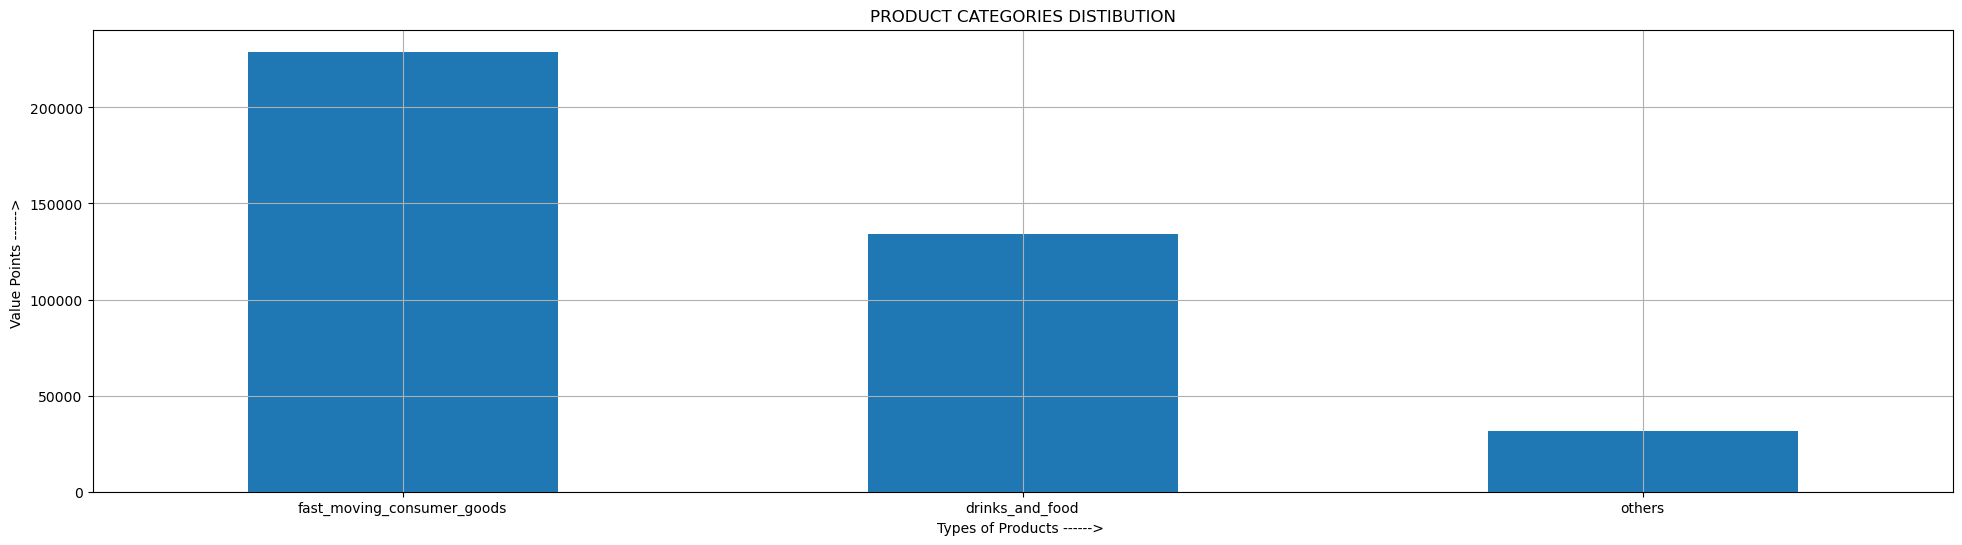

In [48]:
count = data.category_of_product.value_counts()
count.plot(kind = 'bar', rot = 0, figsize = (24,6))
plt.title('PRODUCT CATEGORIES DISTIBUTION')
plt.xlabel('Types of Products ------> ')
plt.ylabel('Value Points ------> ')
plt.grid()

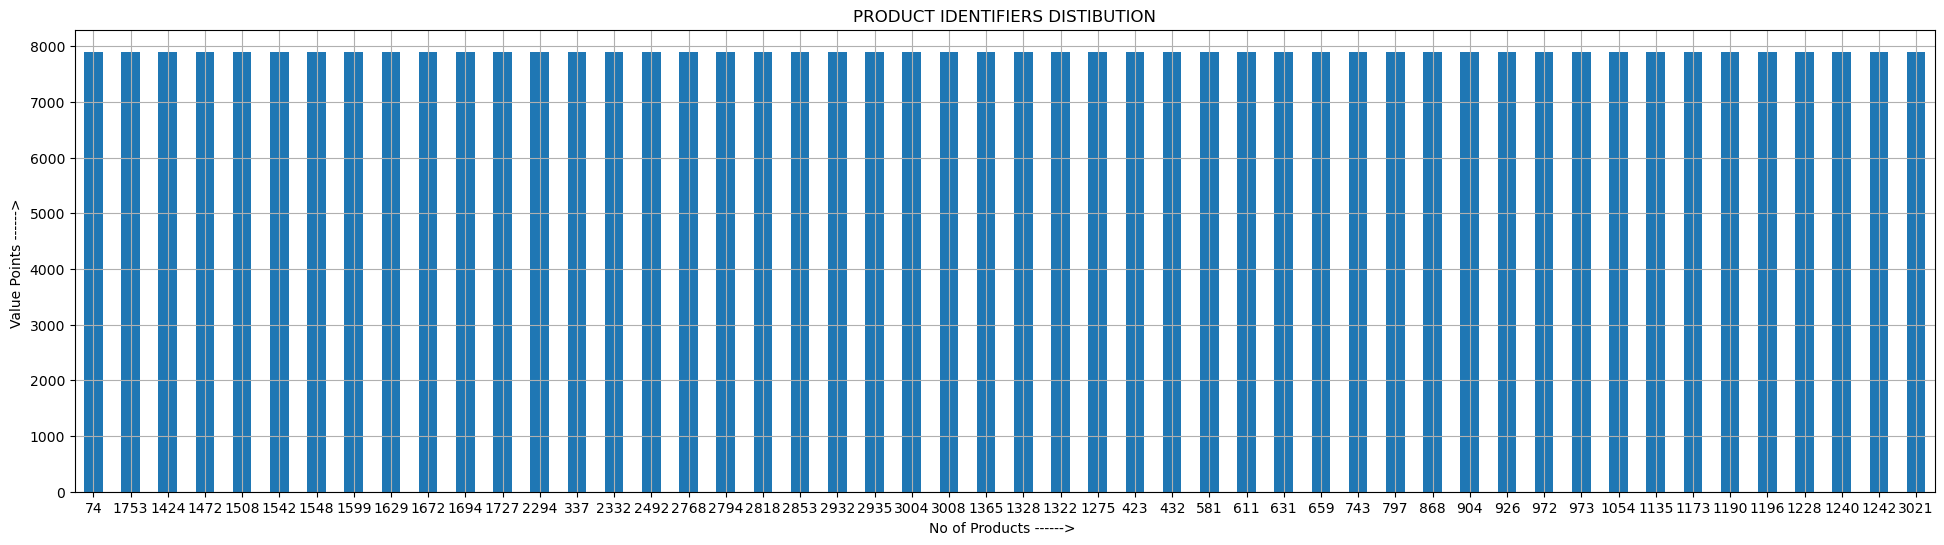

In [49]:
count = data.product_identifier.value_counts()
count.plot(kind = 'bar', rot = 0, figsize = (24,6))
plt.title('PRODUCT IDENTIFIERS DISTIBUTION')
plt.xlabel('No of Products ------> ')
plt.ylabel('Value Points ------> ')
plt.grid()

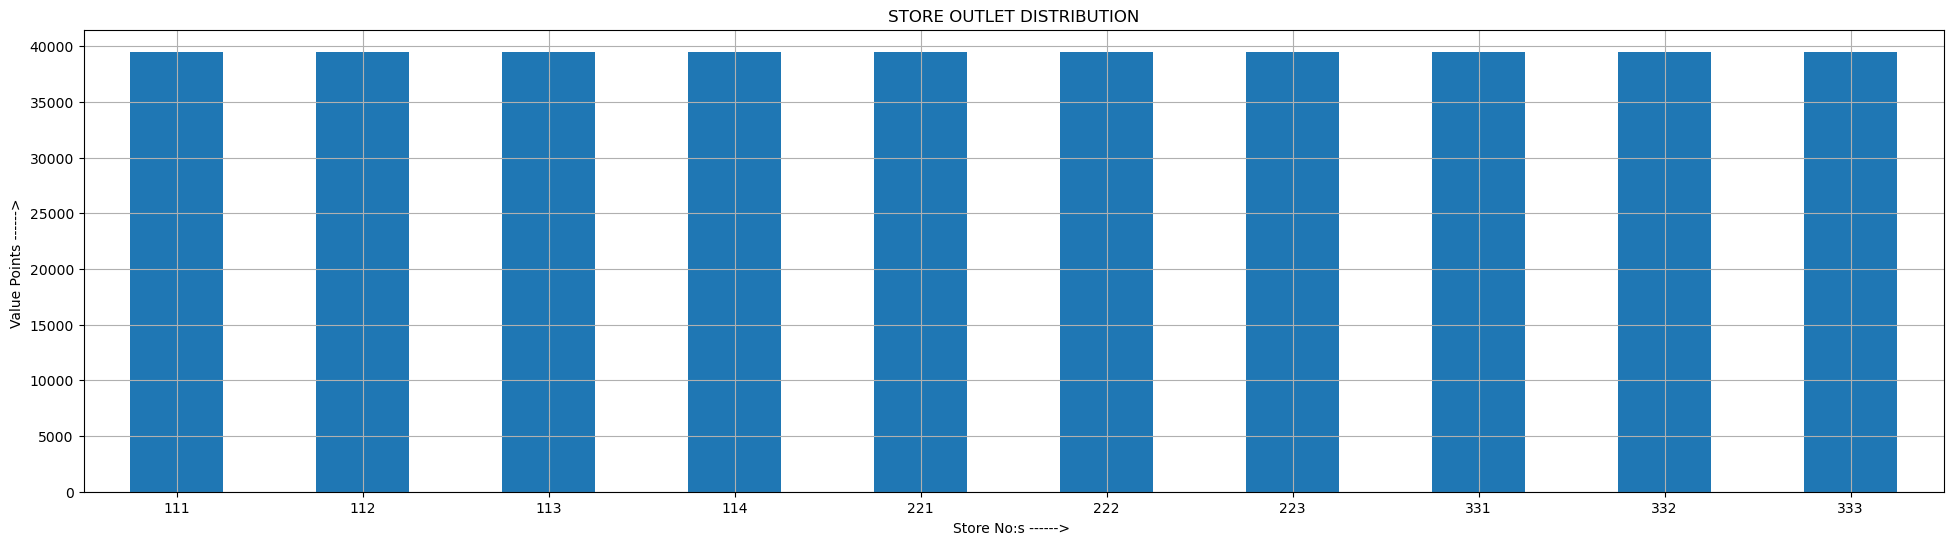

In [50]:
count = data.outlet.value_counts()
count.plot(kind = 'bar', rot = 0, figsize = (24,6))
plt.title('STORE OUTLET DISTRIBUTION')
plt.xlabel('Store No:s ------> ')
plt.ylabel('Value Points ------> ')
plt.grid()

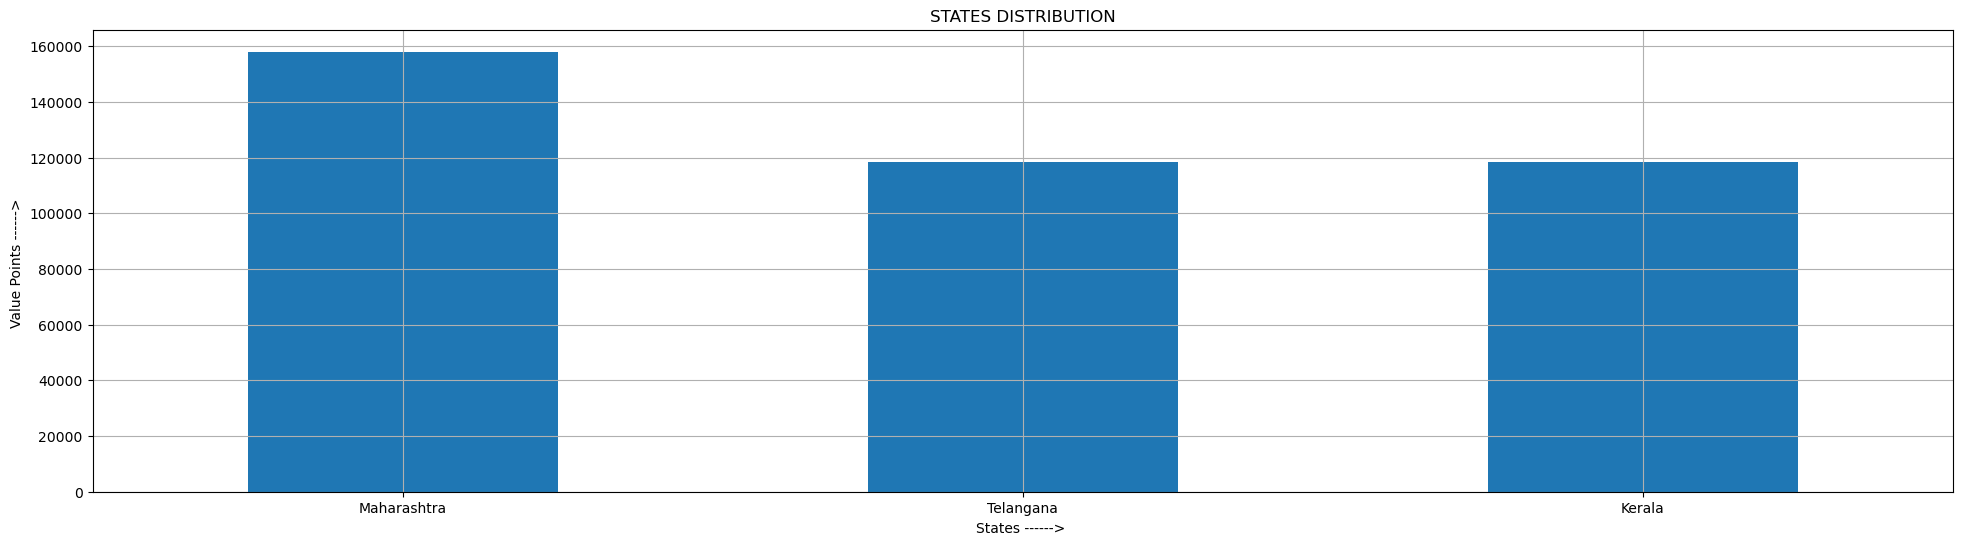

In [51]:
count = data.state.value_counts()
count.plot(kind = 'bar', rot = 0, figsize = (24,6))
plt.title('STATES DISTRIBUTION')
plt.xlabel('States ------> ')
plt.ylabel('Value Points ------> ')
plt.grid()

In [52]:
week.columns

Index(['date', 'week_id'], dtype='object')

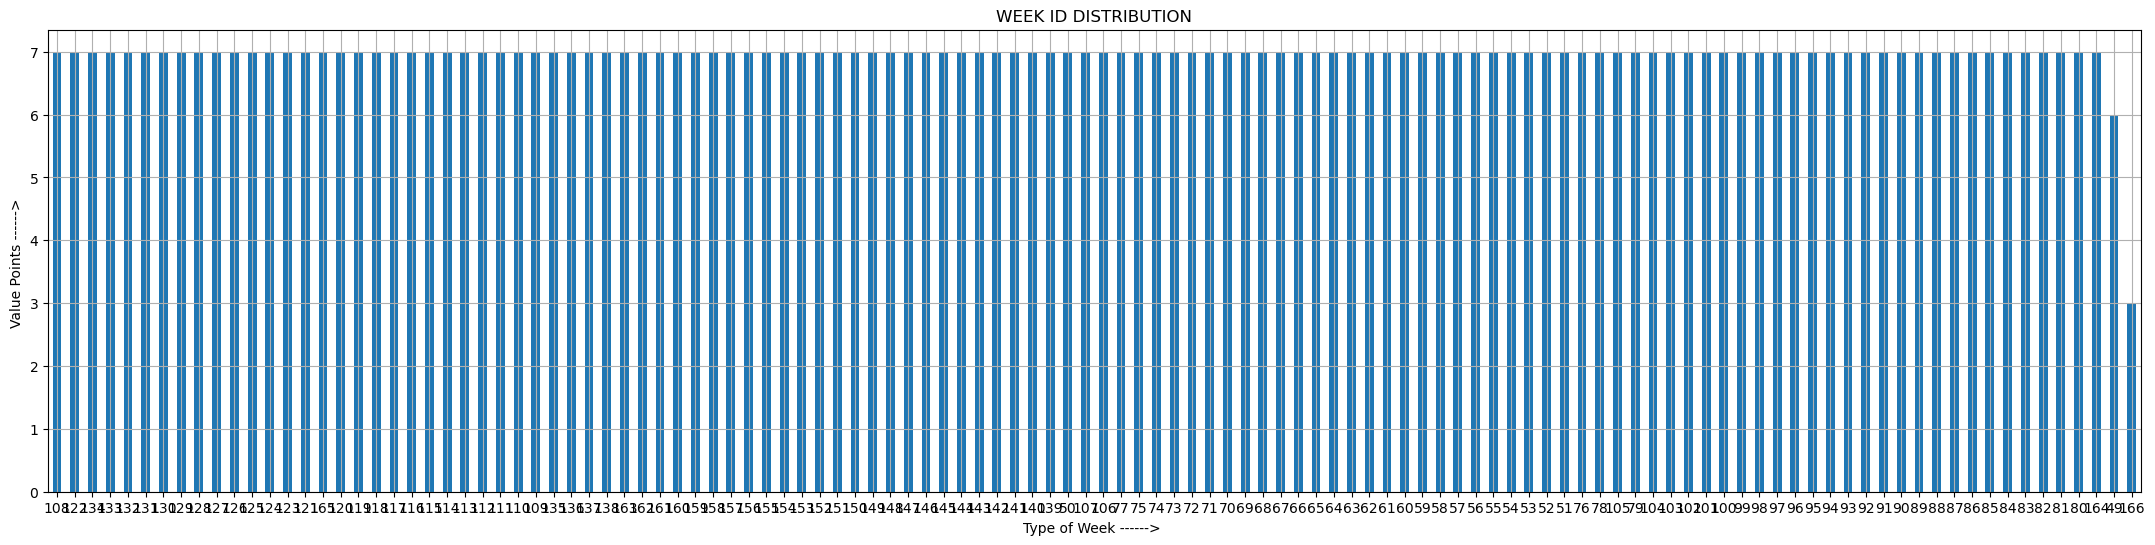

In [53]:
count = week.week_id.value_counts()
count.plot(kind = 'bar', rot = 0, figsize = (27,6))
plt.title('WEEK ID DISTRIBUTION')
plt.xlabel('Type of Week ------> ')
plt.ylabel('Value Points ------> ')
plt.grid()

In [54]:
selling_price.columns

Index(['outlet', 'product_identifier', 'week_id', 'sell_price'], dtype='object')

In [55]:
week.columns

Index(['date', 'week_id'], dtype='object')

In [56]:
data.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

In [57]:
cont = selling_price['sell_price']
disc = data['sales']

    Insight 1: "Sell_Price which is a float64 dtype is a Continuous Variables containing feature" and "Sales which is an int64 dtype is a Discrete Variables containing feature" whereas "Product Identifier, Department Identifier, Category of Product, Outlet, State, Week Id are Categorical Variables containing feature".

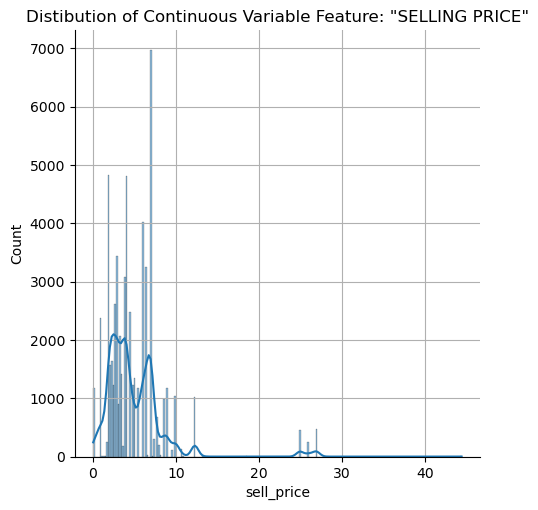

In [58]:
sns.displot(x = cont, kde = True)
plt.title('Distibution of Continuous Variable Feature: "SELLING PRICE"')
plt.grid()

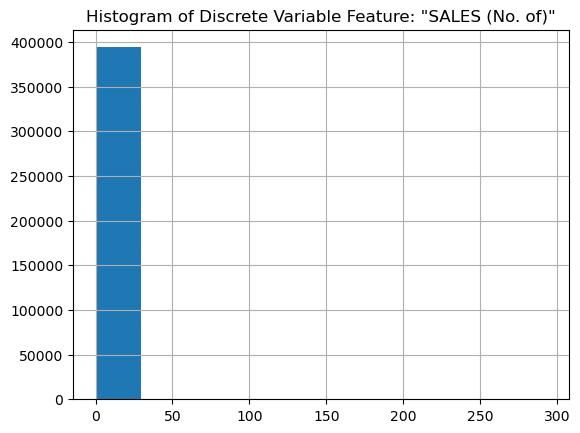

In [59]:
plt.hist(x = disc)
plt.title('Histogram of Discrete Variable Feature: "SALES (No. of)"')
plt.grid()

        => MERGING THE DATA's as Part of FEATURE SELECTION and for the ease of Bi-Variate Analysis.

In [60]:
df = pd.merge(left = selling_price, right = week, on = 'week_id', how = 'inner')
data1 = pd.merge(left = data, right = df, on = ['date', 'product_identifier', 'outlet'])
data1

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


In [61]:
Data = data1.copy()

        => CHANGING DATA TYPES ACCORDING THE NATURE OF FEATURE VARIABLES UNDERSTOOD FROM UNIVARIATE ANALYSIS.

In [62]:
print('-> Before Changing the D-types;''\n', Data.dtypes)
print()
Data['date'] = Data['date'].astype('datetime64[ns]')
Data['product_identifier'] = Data['product_identifier'].astype('category')
Data['department_identifier'] = Data['department_identifier'].astype('category')
Data['category_of_product'] = Data['category_of_product'].astype('category')
Data['outlet'] = Data['outlet'].astype('category')
Data['state'] = Data['state'].astype('category')
Data['week_id'] = Data['week_id'].astype('category')
print()
print('-> After Changing the D-types;''\n', Data.dtypes)

-> Before Changing the D-types;
 date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object


-> After Changing the D-types;
 date                     datetime64[ns]
product_identifier             category
department_identifier          category
category_of_product            category
outlet                         category
state                          category
sales                             int64
week_id                        category
sell_price                      float64
dtype: object


    --> BIVARIATE ANALYSIS.